# Inverse Discrete Fourier Transform

Any $N$ point signal, $x[i]$, can be created by adding $N/2 + 1$ cosine waves and $N/2 + 1$ sine waves. The amplitudes of the cosine and sine waves are held in the arrays $ImX[k]$ and $ReX[k]$, respectively. The synthesis equation multiplies these amplitudes by the basis functions to create a set of scaled sine and cosine waves. Adding the scaled sine and cosine waves produces the time domain signal, $x[i]$.

## Synthesis Equation
$x[i] = \displaystyle\sum_{k=0}^{N/2}{Re\bar{X}[k]\cos{(\frac{2\pi ki}{N}})} + 
\displaystyle\sum_{k=0}^{N/2}{Im\bar{X}[k]\sin{(\frac{2\pi ki}{N}})}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Fourier:
    def __init__(self, rex_signal, imx_signal):
            self.M = len(rex_signal)
            self.N = 2*(self.M - 1) 
            
            self.normRex = rex_signal/(self.N/2)
            self.normRex[0] = rex_signal[0]/self.N
            self.normRex[int(self.N/2)] = rex_signal[int(self.N/2)]/self.N

            self.normImx = -imx_signal/(self.N/2)
            
        
    def idft(self):       
        self.rex = np.zeros(self.N)
        self.imx = np.zeros(self.N)
        
        for i in range(self.N):
            for k in range (int(self.M)-1):
                self.rex[i] = self.rex[i] + self.normRex[k]*np.cos(2*np.pi*k*i/self.N)
                self.imx[i] = self.imx[i] + self.normImx[k]*np.sin(2*np.pi*k*i/self.N)
        self.idft_signal = self.rex + self.imx


### Read real and imaginary part of DFT

In [3]:
rex = np.loadtxt(fname = "rex.dat").flatten()
imx = np.loadtxt(fname = "imx.dat").flatten()

### Run IDFT

In [4]:
idft = Fourier(rex, imx)
idft.idft()

### Compare results

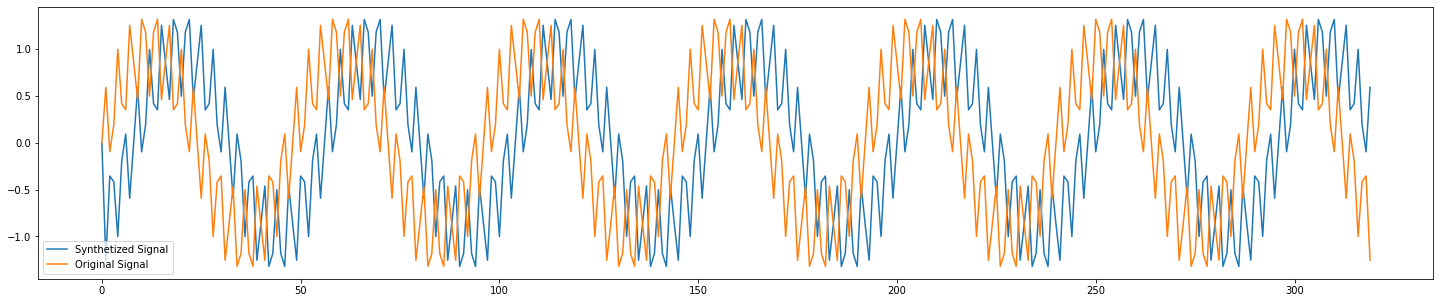

In [5]:
x = np.loadtxt(fname = "signal.dat").flatten()
plt.rcParams["figure.figsize"] = (25,5)
plt.plot(idft.idft_signal, label='Synthetized Signal')
plt.plot(x, label='Original Signal')
plt.legend();

### Finding shifting value
To find the shifting value we calculate an error mean square error function between the original and synthetized signal.

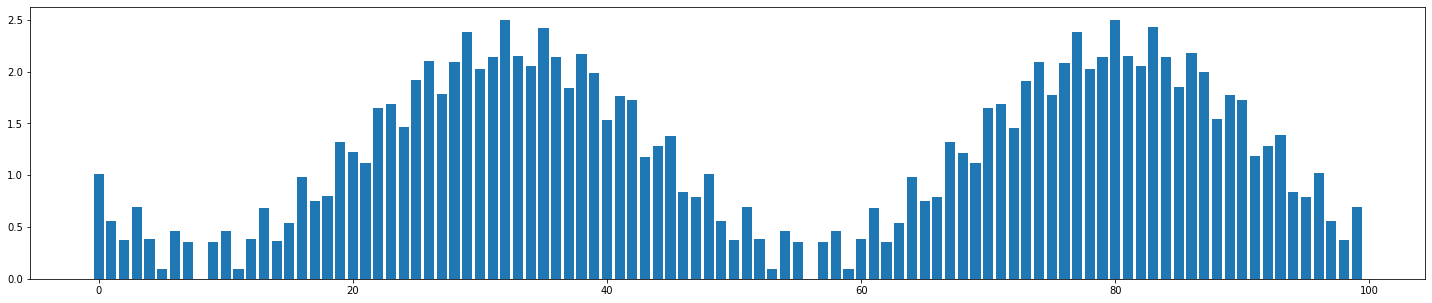

In [6]:
def error(size):
    error = np.zeros(size)
    for k in range(size):
        if k==0:
            error[k] =  sum((x-idft.idft_signal)**2)/(len(x))
        else:
            error[k] =  sum((x[:-k]-idft.idft_signal[k:])**2)/(len(x)-k)
            
    return error

size =100

plt.bar(range(size), error(size));

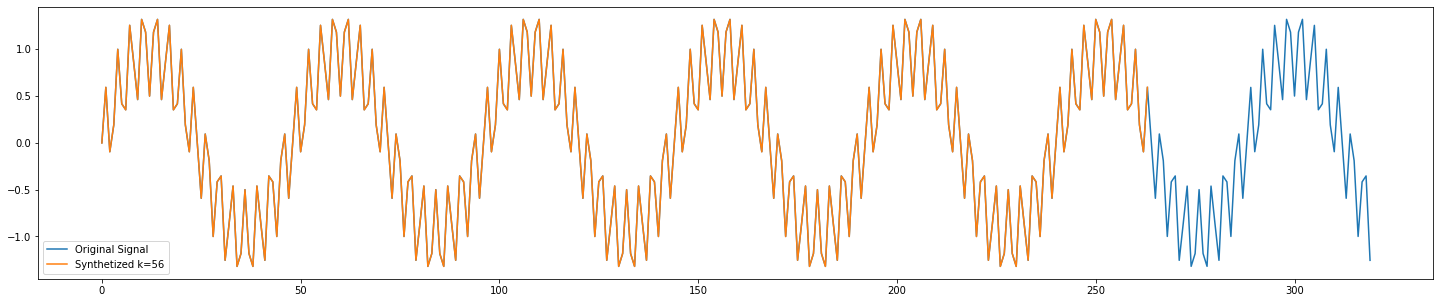

In [12]:
k = 56
plt.plot(x, label='Original Signal')
plt.plot(np.arange(0,320-k), idft.idft_signal[k:320], label='Synthetized k={}'.format(k))
plt.legend();

# Beta

In [8]:
import nbinteract as nbi

def x_values(n): 
    return np.arange(n)

def heights(xs, offset):
    return xs + offset

def error(xs):
    size = xs.max()
    error = np.zeros(size)
    for k in range(size):
        if k==0:
            error[k] =  sum((x-idft.idft_signal)**2)/(len(x))
        else:
            error[k] =  sum((x[:-k]-idft.idft_signal[k:])**2)/(len(x)-k)
            
    return error

opts = {
    'ylim': (0, 3),
    'title' : 'Error function',
    'aspect_ratio' : 3,
    'animation_duration' : 100
}

nbi.bar(x_values, error, n=(1, 160), options=opts)

In [9]:
def x_values(k): return np.arange(0,320-k)
def y_values(xs, k): return idft.idft_signal[320-xs.max():320]

opts = {
    'xlim': (0, 319),
    'ylim': (-2, 2),
    'animation_duration': 1,
}
#nbi.line(np.arange(320), idft.idft_signal, options=opts)
nbi.line(x_values, y_values, k=(1, 319), options=opts)

In [10]:
#nbi.line?